<BarContainer object of 101 artists>

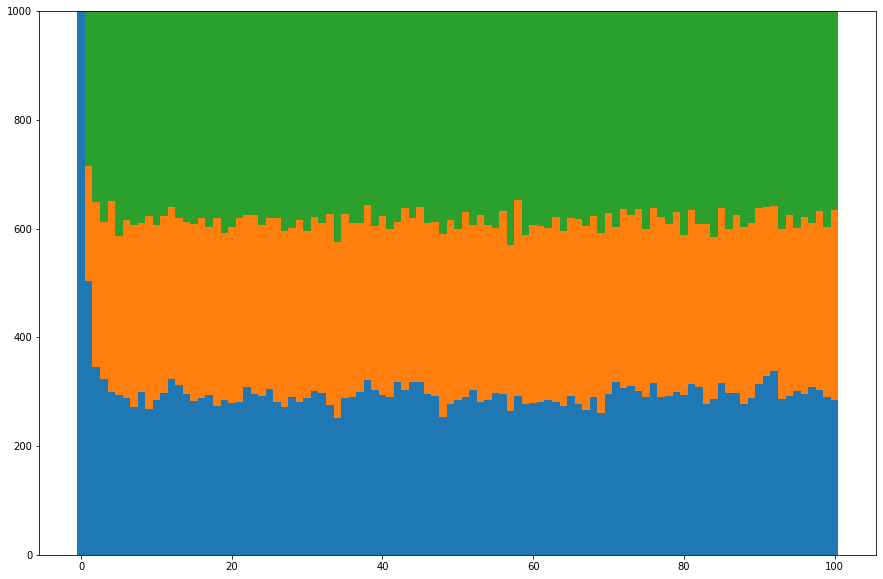

In [63]:
import numpy as np
import matplotlib.pyplot as pyp


# assume three states that can all transition to each other with some probability on a given timestep;
# calculate the steady-state solution
#
# Transition probability matrix has the form:
#
#                       Transition from...
#                          A     B     C
#                     A   0.5   0.1   0.3
#   Transition to...  B   0.2   0.1   0.6
#                     C   0.3   0.8   0.1
#
# Note each row should sum to 100%


class markov_system:
    def __init__(self):
        self.transition_matrix = [[0.5, 0.1, 0.3],
                                  [0.2, 0.1, 0.6],
                                  [0.3, 0.8, 0.1]]
        self.current_system = [1000, 0, 0]
        self.num_iterations = 100
        return
        
    def timestep(self):
        new_system = [0, 0, 0]
        
        for state in range(len(self.current_system)):
            for each_unit in range(self.current_system[state]):
                rv = np.random.uniform()
                
                if (rv < self.transition_matrix[0][state]):
                    new_system[0] += 1
                elif (rv < (self.transition_matrix[0][state] + self.transition_matrix[1][state])):
                    new_system[1] += 1
                else:
                    new_system[2] += 1
                    
        self.current_system = new_system
        
        return 
        

markov = markov_system()
system_history = np.array([markov.current_system])


for i in range(markov.num_iterations):
    markov.timestep()
    system_history = np.append(system_history, [markov.current_system], axis = 0)
    

pyp.figure(figsize = (15, 10))
    
index = range(len(system_history.T[0]))

pyp.bar(index, system_history.T[0], 1)
pyp.bar(index, system_history.T[1], 1, bottom = system_history.T[0])
pyp.bar(index, system_history.T[2], 1, bottom = (system_history.T[0] + system_history.T[1]))


In [64]:
# Steady state solution:
#
# For some [X, Y, Z],
#
# | X |    | p11 p12 p13 | | X |
# | Y | =  | p21 p22 p23 | | Y |
# | Z |    | p31 p32 p33 | | Z |
#
# X = X*p11 + Y*p12 + Z*p13
# Y = X*p21 + Y*p22 + Z*p23
# Z = X*p31 + Y*p32 + Z*p33
# X + Y + Z = 1
#


In [68]:
matrix = np.array(markov.transition_matrix)

matrix = [[0.6, 0.6],
          [0.4, 0.4]]

print(np.linalg.det(matrix))
print(np.linalg.eig(matrix))

-4.440892098500636e-18
(array([1., 0.]), array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))
